# Flame Speed

In this example we simulate a freely-propagating, adiabatic, 1-D flame and
* Calculate its laminar burning velocity
* Perform a sensitivity analysis of its kinetics

The figure below illustrates the setup, in a flame-fixed co-ordinate system. The reactants enter with density $\rho_{u}$, temperature $T_{u}$ and speed $S_{u}$. The products exit the flame at speed $S_{b}$, density $\rho_{b}$ and temperature $T_{b}$.

<img src="flame-speed-example/flameSpeed.png" alt="Freely Propagating Flame" style="width: 300px;"/>

### Import Modules

In [1]:
import cantera as ct
import numpy as np

print("Running Cantera Version: " + str(ct.__version__))

Running Cantera Version: 2.4.0a1


### Define the reactant conditions, gas mixture and kinetic mechanism associated with the gas

In [2]:
#Inlet Temperature in Kelvin and Inlet Pressure in Pascals
#In this case we are setting the inlet T and P to room temperature conditions
To = 300
Po = 101325

#Define the gas-mixutre and kinetics
#In this case, we are choosing a GRI3.0 gas
gas = ct.Solution('gri30.cti')

# Create a stoichiometric CH4/Air premixed mixture 
gas.set_equivalence_ratio(1.0, 'CH4', {'O2':1.0, 'N2':3.76})
gas.TP = To, Po

### Define flame simulation conditions

In [3]:
# Domain width in meters
width = 0.014

# Create the flame object
flame = ct.FreeFlame(gas, width=width)

# Define tolerances for the solver
flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# Set multi-component transport
flame.transport_model = 'Multi'

# Define logging level
loglevel = 1

### Solve

The `auto` option in the solve function tries to "automatically" solve the flame by applying a few common techniques. First, the flame is solved on a sparse grid with the transport calculations set to mixture averaged. Then grid refinement is enabled, with points added according to the values of the `ratio`, `slope`, and `curve` parameters in the `set_refine_criteria` function. If the initial solve on the sparse grid fails to converge, the simulation is attempted again, but this time with the energy equation disabled. Once the simulation has been solved on the refined grid with the mixture averaged transport, Cantera enables the multicomponent transport and Soret diffusion, if they have been set by the user.

In general, it is recommended that you use the `auto` option the first time you run the solver, unless the simulation fails. On subsequent invocations of `solve`, you should not include the `auto` option (or set it to `False`).

In [4]:
flame.solve(loglevel=loglevel, auto=True)


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      5.446
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      4.417
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.871e-05      5.791
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.601e-05      5.905
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009998      4.303
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

.................

In [5]:
Su0 = flame.u[0]
print("Flame Speed is: {:.2f} cm/s".format(Su0*100))

Flame Speed is: 38.47 cm/s


### Plot figures

Check and see if all has gone well. Plot temperature and species fractions to see. We expect that the solution at the boundaries of the domain will have zero gradient (in other words, that the domain width that we specified is wide enough for the flame).

In [6]:
# Import plotting modules and define plotting preference

%matplotlib notebook
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (8,6)

# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')

plt.rcParams['figure.autolayout'] = True

#### Temperature Plot

<IPython.core.display.Javascript object>


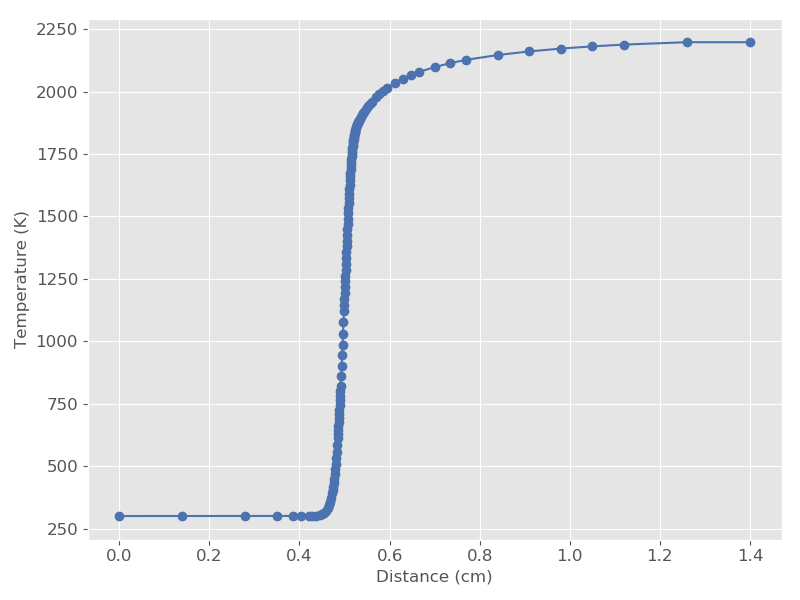

In [7]:
plt.figure()

plt.plot(flame.grid*100, flame.T, '-o')
plt.xlabel('Distance (cm)')
plt.ylabel('Temperature (K)');

#### Major species' plot

<IPython.core.display.Javascript object>


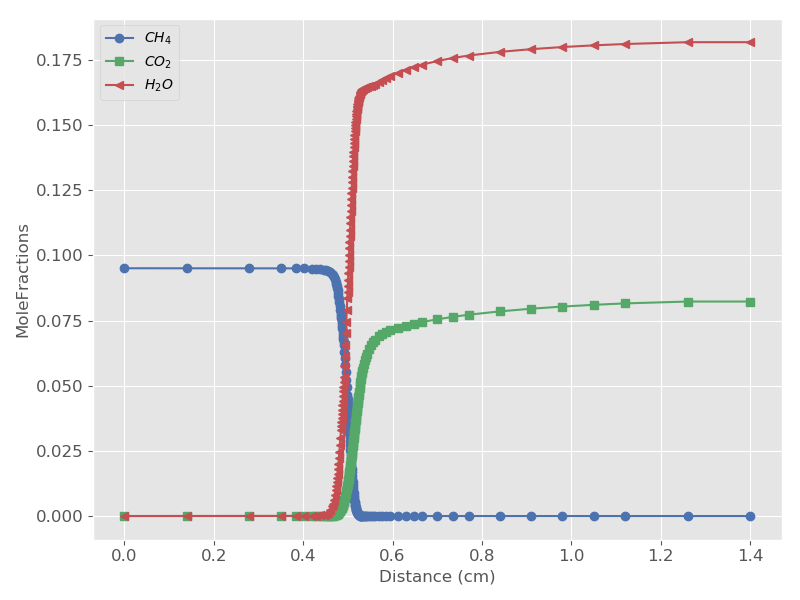

In [8]:
CH4_i = flame.gas.species_index('CH4')
CO2_i = flame.gas.species_index('CO2')
H2O_i = flame.gas.species_index('H2O')

# Extract concentration data
X_CH4 = flame.X[CH4_i]
X_CO2 = flame.X[CO2_i]
X_H2O = flame.X[H2O_i]

plt.figure()

plt.plot(flame.grid*100, X_CH4, '-o', label=r'$CH_{4}$')
plt.plot(flame.grid*100, X_CO2, '-s', label=r'$CO_{2}$')
plt.plot(flame.grid*100, X_H2O, '-<', label=r'$H_{2}O$')

plt.legend(loc=2)
plt.xlabel('Distance (cm)')
plt.ylabel('MoleFractions');